
Linear Regression Performance:
MAE: 12688.30
MSE: 339607191.70
RMSE: 18428.43
R² Score: 0.9232

Decision Tree (Tuned) Performance:
MAE: 18376.14
MSE: 795692920.34
RMSE: 28208.03
R² Score: 0.8201


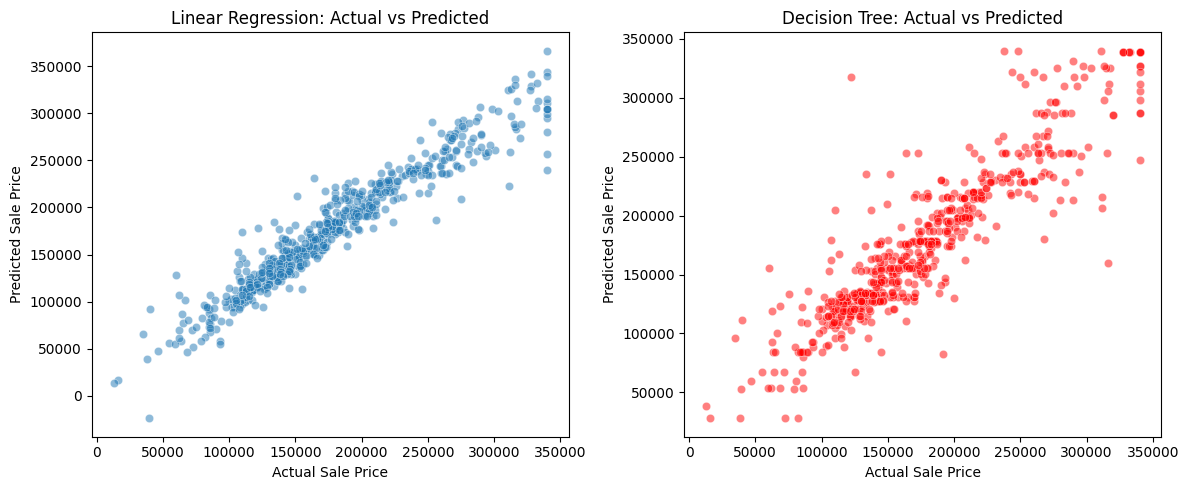

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/housing_prices_cleaned.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["Id", "Unnamed: 0"], errors='ignore')

# Separate features and target variable
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Train Decision Tree model with hyperparameter tuning
param_grid = {'max_depth': [3, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
dt_model = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.best_estimator_.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree (Tuned)")

# Plot actual vs predicted prices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Linear Regression: Actual vs Predicted")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.5, color='red')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Decision Tree: Actual vs Predicted")

plt.tight_layout()
plt.show()
